**Ejecuta esta linea de código para descargar los datos necesarios para correr el notebook**

In [1]:
!wget https://raw.githubusercontent.com/cosmolejo/dataRepo/master/train.csv
!wget https://raw.githubusercontent.com/cosmolejo/dataRepo/master/test.csv

--2022-03-17 22:02:15--  https://raw.githubusercontent.com/cosmolejo/dataRepo/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.004s  

2022-03-17 22:02:15 (15.6 MB/s) - ‘train.csv’ saved [61194/61194]

--2022-03-17 22:02:15--  https://raw.githubusercontent.com/cosmolejo/dataRepo/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘test.csv’

test.c

#Introducción a Sklearn

Este [notebook](https://www.kaggle.com/ialimustufa/titanic-beginner-s-guide-with-sklearn/data#) fue tomado de la plataforma [kagle](https://www.kaggle.com/#) una comunidad en línea de científicos de datos y profesionales del aprendizaje automático. En ella encontrarán distintos tutoriales, bancos de datos y competencias remuneradas en ciencias de datos.

Creditos a ***ALI MUSTUFA SHAIKH***

# Machine Learning to Predict Titanic Survivors 
Hi, I'm a current undergraduate student interested in the Data Science and Machine Learning field. In this Kernel, I will try to step by step build a ML model using sklearn to predict the outcomes of each passenger aboard the titanic. This guide is meant for people starting with data visualization, analysis and Machine Learning. If that sounds like you, then you're in the right place! It is not as difficult as you think to understand.

*Please upvote and share if this helps you!! Also, feel free to fork this kernel to play around with the code and test it for yourself. If you plan to use any part of this code, please reference this kernel!* I will be glad to answer any questions you may have in the comments. Thank You! 


## Update
Thank you all so much for the support and reading this kernel! I am very inspired to keep learning and I hope you are too. I am in the progress of making more kernels for more competitions as well as ones for data visualization and statistics. Please stay tuned for those, as I will be publishing them very soon! Again, thank you so much and please feel free to contact me or ask any questions! 

# Contents
1. [Importing Libraries and Packages](#p1)
2. [Loading and Viewing Data Set](#p2)
3. [Dealing with NaN Values (Imputation)](#p3)
4. [Plotting and Visualizing Data](#p4)
5. [Feature Engineering](#p5)
6. [Modeling and Predicting with sklearn](#p6)
7. [Evaluating Model Performances](#p7)
8. [Tuning Parameters with GridSearchCV](#p8)
9. [Submission](#p9)

<a id="p1"></a>
# 1. Importing Libraries and Packages
We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

<a id="p2"></a>
# 2. Loading and Viewing Data Set
With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.

In [ ]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<a id="p3"></a>
# 3. Dealing with NaN Values (Imputation)
There are NaN values in our data set in the age column. Furthermore, the Cabin column has too many missing values and isn't useful to be used in predicting survival. We can just drop the column as well as the NaN values which will get in the way of training our model. We also need to fill in the NaN values with replacement values in order for the model to have a complete prediction for every row in the data set. This process is known as **imputation** and we will show how to replace the missing data.

In [ ]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We take a look at the distribution of the Age column to see if it's skewed or symmetrical. This will help us determine what value to replace the NaN values.

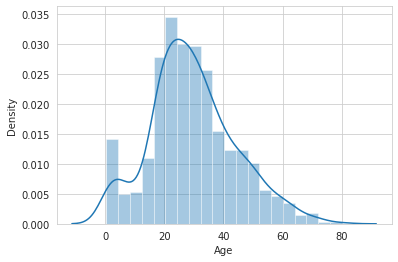

In [ ]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

* Looks like the distribution of ages is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy.

In [ ]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)


Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<a id="p4"></a>
# 4. Plotting and Visualizing Data
It is very important to understand and visualize any data we are going to use in a machine learning model. By visualizing, we can see the trends and general associations of variables like Sex and Age with survival rate. We can make several different graphs for each feature we want to work with to see the entropy and information gain of the feature. 

**Gender**

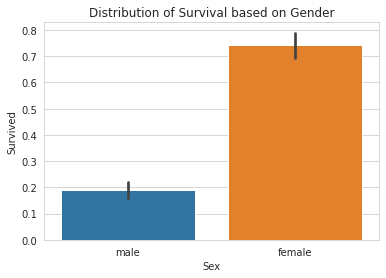

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [ ]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

> Note that the numbers printed above are the proportion of male/female survivors of all the surviviors ONLY. The graph shows the propotion of male/females out of ALL the passengers including those that didn't survive.

Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived. Let's take a look at how class plays a role in survival as well.

**Class**

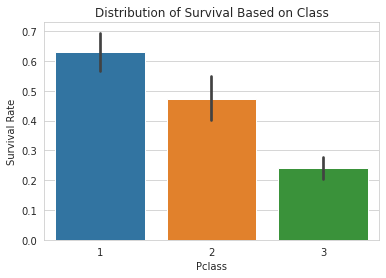

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [ ]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

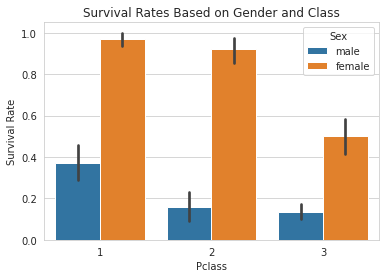

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

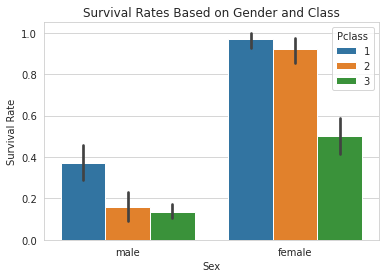

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

It appears that class also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

**Age**

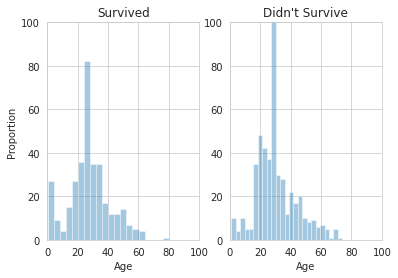

In [ ]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

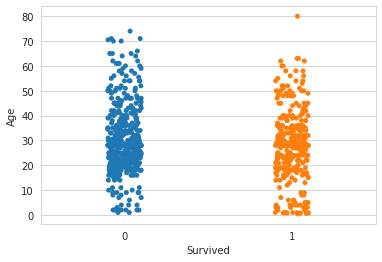

In [ ]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

<a id="p5"></a>
# 5. Feature Engineering
Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. We can also do this process through **One-Hot-Encoding**.

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,16.1000,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,30.6958,C
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,28.0,1,0,15.5000,Q
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,6.4958,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,13.0000,S


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
295,1187,3,"Angheloff, Mr. Minko",male,26.0,0,0,7.8958,S
347,1239,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
227,1119,3,"McNeill, Miss. Bridget",female,27.0,0,0,7.7500,Q
173,1065,3,"Torfa, Mr. Assad",male,27.0,0,0,7.2292,C
99,991,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,8.0500,S


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.

In [ ]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
314,1206,1,"White, Mrs. John Stuart (Ella Holmes)",1,55.0,0,0,135.6333,1
177,1069,1,"Stengel, Mr. Charles Emil Henry",0,54.0,1,0,55.4417,1
243,1135,3,"Hyman, Mr. Abraham",0,27.0,0,0,7.8875,0
34,926,1,"Mock, Mr. Philipp Edmund",0,30.0,1,0,57.7500,1
70,962,3,"Mulvihill, Miss. Bertha E",1,24.0,0,0,7.7500,2
131,1023,1,"Gracie, Col. Archibald IV",0,53.0,0,0,28.5000,1
198,1090,2,"Baimbrigge, Mr. Charles Robert",0,23.0,0,0,10.5000,0
353,1245,2,"Herman, Mr. Samuel",0,49.0,1,2,65.0000,0
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",1,55.0,2,0,25.7000,0
320,1212,3,"Andersson, Mr. Johan Samuel",0,26.0,0,0,7.7750,0


We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member. 

In [ ]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

In [ ]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Although it may not seem like it, we can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

In [ ]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [ ]:
print(set(training["Title"]))

{0, 1, 2, 3, 4}


In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
466,467,0,2,"Campbell, Mr. William",0,28.0,0,0,0.0000,0,1,1,1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,1
76,77,0,3,"Staneff, Mr. Ivan",0,28.0,0,0,7.8958,0,1,1,1
510,511,1,3,"Daly, Mr. Eugene Patrick",0,29.0,0,0,7.7500,2,1,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,12.3500,2,1,1,4


<a id="p6"></a>
# 6. Model Fitting and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. We will try different types of models to see which one gives the best accuracy for its predictions.

**sklearn Models to Test**

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorere and accuracy_score function from sklearn metrics.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score 

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

In [ ]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [ ]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

**Validation Data Set**

Although we already have a test set, it is generally easy to overfit the data with these classifiers. It is therefore useful to have a third data set called the validation data set to ensure that our model doesn't overfit with the data. We can make this third data set with sklearn's train_test_split function. We can also use the validation data set to test the general accuracy of our model.

In [ ]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

**SVC Model**

In [ ]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7262569832402235


**LinearSVC Model**

In [ ]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.7430167597765364


**RandomForest Model**

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8435754189944135


**LogisiticRegression Model**

In [ ]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8100558659217877


**KNeighbors Model**

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


**GaussianNB Model**

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


**DecisionTree Model**

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


<a id="p7"></a>
# 7. Evaluating Model Performances
After making so many models and predictions, we should evaluate and see which model performed the best and which model to use on our testing set.

In [ ]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.843575
3,Logistic Regression,0.810056
5,Gaussian Naive Bayes,0.787709
6,Decision Tree,0.776536
1,Linear SVC,0.743017
4,K Nearest Neighbors,0.743017
0,SVC,0.726257


It appears that the Random Forest model works the best with our data so we will use it on the test set.